In [1]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Descriptors
from rdkit.Chem.Draw import IPythonConsole

# Basic descriptors

[Descriptors](https://en.wikipedia.org/wiki/Molecular_descriptor) are numeric or boolean ways of representing molecule properties. They can be simple structural properties such as the count of rings we did in the last two exercises, count of rotatable bonds within a molecule, or count of all non-hydrogen atoms, count of hydrogen bond acceptors and donors, a boolean value representing the presence of a specific group or substructure in the molecule, etc. Physico-chemical properties are also often used as descriptors: molecular weight, topological [polar surface area](https://en.wikipedia.org/wiki/Polar_surface_area), polarizability, refractivity, octanol-water [partition coefficient](https://en.wikipedia.org/wiki/Partition_coefficient), etc.

The aforementioned descriptor types are the most basic, but also very frequently used types. Classics aside, there are literally hundreds of various documented descriptors, involving even stuff like quantum-chemical computation or structural elasticity. In practice, a descriptor can be almost any quantifiable property of a molecule or its part, that carries useful information about that molecule.

A summary article on descriptors:
http://www.chemicke-listy.cz/docs/full/2017_11_716-723.pdf

The most used descriptors are already implemented in RDKit, and can be obtained by from RDKit Mol instances:

In [2]:
# loading dataset
import csv
with open('./data/DOWNLOAD-ligands_for_serotonine_rec.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";")
    serotonine_ligands = [Chem.MolFromSmiles(m['Smiles']) for m in reader]

well, that's our structures loaded as RDKit Mol instances. Let's try computing some descriptors for a randomly selected Mol instance:

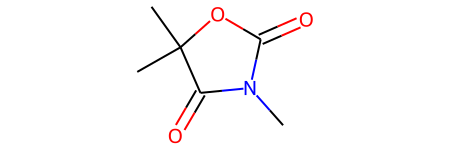

In [3]:
serotonine_ligands[666]

In [4]:
print(len(serotonine_ligands))

1876


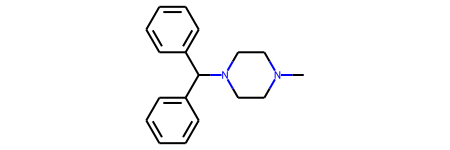

In [5]:
serotonine_ligands[1234]

In [7]:
# count of rings:
Chem.GetSSSR(serotonine_ligands[1234])

3

In [8]:
# count of rotatable bonds:
Chem.CalcNumRotatableBonds(serotonine_ligands[1234])

3

In [9]:
# count of all heavy/non-hydrogen atoms
serotonine_ligands[1234].GetNumHeavyAtoms()

20

In [10]:
# hydrogen bond acceptors / donors
from rdkit.Chem import rdMolDescriptors as rdescriptors
rdescriptors.CalcNumLipinskiHBA(serotonine_ligands[1234]), rdescriptors.CalcNumLipinskiHBD(serotonine_ligands[1234])

(2, 0)

In [11]:
# molecular weight
rdescriptors.CalcExactMolWt(serotonine_ligands[1234])

266.178298704

In [12]:
# topological polar surface area
rdescriptors.CalcTPSA(serotonine_ligands[1234])

6.48

In [13]:
# octanol-water partition coefficient
Descriptors.MolLogP(serotonine_ligands[1234])

3.0234000000000014

In [14]:
import time

This is about as much as we will need today, there are many more descriptors. Some [more](https://www.rdkit.org/docs/GettingStartedInPython.html#list-of-available-descriptors) are in the [RDKit docs](https://www.rdkit.org/docs/source/rdkit.Chem.rdMolDescriptors.html). Let's do the current descriptors for the entire set, and load them into a pandas dataframe. This might take a while :)

In [15]:
start = time.time()

serotonine_rings = [Chem.GetSSSR(l) for l in serotonine_ligands]
serotonine_rotatable = [Chem.CalcNumRotatableBonds(l) for l in serotonine_ligands]
serotonine_atomcount = [l.GetNumHeavyAtoms() for l in serotonine_ligands]
serotonine_hba = [rdescriptors.CalcNumLipinskiHBA(l) for l in serotonine_ligands]
serotonine_hbd = [rdescriptors.CalcNumLipinskiHBD(l) for l in serotonine_ligands]
serotonine_molwt = [rdescriptors.CalcExactMolWt(l) for l in serotonine_ligands]
serotonine_tpsa = [rdescriptors.CalcTPSA(l) for l in serotonine_ligands]
serotonine_logp = [Descriptors.MolLogP(l) for l in serotonine_ligands]

end = time.time()
print(end - start)

3.1338584423065186


In [16]:
import pandas as pd
import seaborn as sns

In [23]:
start = time.time()

ligands = pd.DataFrame(data={'molecule': serotonine_ligands})
ligands["rings"] = ligands["molecule"].apply(lambda x: Chem.GetSSSR(x))
ligands["rotatable"] = ligands["molecule"].apply(lambda x: Chem.CalcNumRotatableBonds(x))
ligands["atoms"] = ligands["molecule"].apply(lambda x: x.GetNumHeavyAtoms())
ligands["hba"] = ligands["molecule"].apply(lambda x: rdescriptors.CalcNumLipinskiHBA(x))
ligands["hbd"] = ligands["molecule"].apply(lambda x: rdescriptors.CalcNumLipinskiHBD(x))
ligands["molwt"] = ligands["molecule"].apply(lambda x: rdescriptors.CalcExactMolWt(x))
ligands["tpsa"] = ligands["molecule"].apply(lambda x: rdescriptors.CalcTPSA(x))
ligands["logp"] = ligands["molecule"].apply(lambda x: Descriptors.MolLogP(x))

end = time.time()
print(end - start)

0.8083455562591553


In [27]:
ligands

,molecule,rings,rotatable,atoms,hba,hbd,molwt,tpsa,logp
0,<rdkit.Chem.rdchem.Mol object at 0x000001B4F0F...,5,8,39,7,2,523.294725,73.63,4.37746
1,<rdkit.Chem.rdchem.Mol object at 0x000001B4F0F...,5,2,25,4,0,352.115796,23.78,4.01470
2,<rdkit.Chem.rdchem.Mol object at 0x000001B4F0F...,4,3,28,6,1,406.204801,47.53,2.56330
3,<rdkit.Chem.rdchem.Mol object at 0x000001B4F0F...,2,2,18,3,1,246.173213,32.34,2.72624
4,<rdkit.Chem.rdchem.Mol object at 0x000001B4F0F...,1,10,21,7,2,331.113667,83.33,1.32250
...,...,...,...,...,...,...,...,...,...
1871,<rdkit.Chem.rdchem.Mol object at 0x000001B4F0F...,4,4,24,4,2,335.109233,61.27,3.96130
1872,<rdkit.Chem.rdchem.Mol object at 0x000001B4F0F...,3,3,19,4,2,273.093583,61.27,2.60850
1873,<rdkit.Chem.rdchem.Mol object at 0x000001B4F0F...,3,2,17,3,2,230.141913,40.18,2.00450
1874,<rdkit.Chem.rdchem.Mol object at 0x000001B4F0F...,5,3,27,4,0,416.062923,23.78,5.17800


In [24]:

sns.set(rc={'figure.figsize':(11.7, 11.7)}) # for bigger graphs

In [26]:
df = pd.DataFrame(data={'set':'serotonine', 'rings': serotonine_rings,
                        'rotatable': serotonine_rotatable, 'atoms': serotonine_atomcount,
                        'hba': serotonine_hba, 'hbd': serotonine_hbd, 'molwt': serotonine_molwt,
                        'tpsa': serotonine_tpsa, 'logp': serotonine_logp})
df

,set,rings,rotatable,atoms,hba,hbd,molwt,tpsa,logp
0,serotonine,5,8,39,7,2,523.294725,73.63,4.37746
1,serotonine,5,2,25,4,0,352.115796,23.78,4.01470
2,serotonine,4,3,28,6,1,406.204801,47.53,2.56330
3,serotonine,2,2,18,3,1,246.173213,32.34,2.72624
4,serotonine,1,10,21,7,2,331.113667,83.33,1.32250
...,...,...,...,...,...,...,...,...,...
1871,serotonine,4,4,24,4,2,335.109233,61.27,3.96130
1872,serotonine,3,3,19,4,2,273.093583,61.27,2.60850
1873,serotonine,3,2,17,3,2,230.141913,40.18,2.00450
1874,serotonine,5,3,27,4,0,416.062923,23.78,5.17800


Ok, that's already a nice hefty table. Let's visualize the values, maybe some [boxplots](https://en.wikipedia.org/wiki/Box_plot)?

<AxesSubplot:>

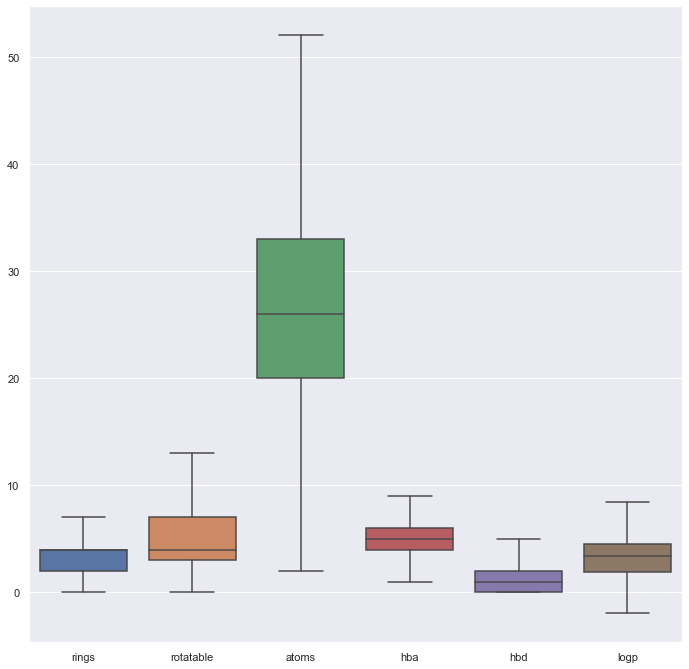

In [28]:
sns.boxplot(data=df[['rings', 'rotatable', 'atoms', 'hba', 'hbd', 'logp']], showfliers=False)

In the above boxplots, the distributions of most descriptors are depicted right next to each other. Molecular weight and TPSA are too off-scale for this.

<AxesSubplot:>

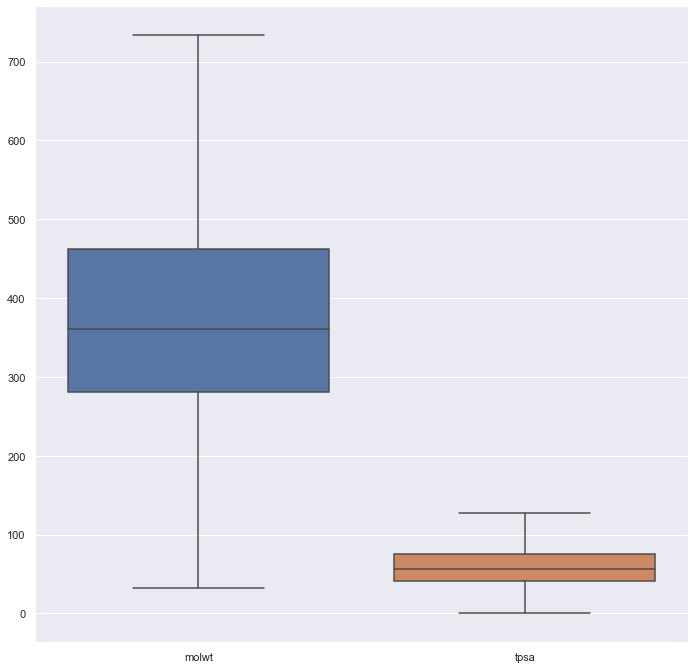

In [29]:
sns.boxplot(data=df[['molwt', 'tpsa']], showfliers = False)

The above two graphs cover the selected descriptors for the mTOR set. However, it would be much better if we had some reference data to compare this set against: how about DrugBank, a database of registered pharmaceuticals?

In [30]:
suppl = Chem.SDMolSupplier('../data/drugbank.sdf')
drugs = [m for m in suppl if m]
len(drugs)

7115

In [32]:
start = time.time()
drugbank_rings = [Chem.GetSSSR(l) for l in c]
drugbank_rotatable = [Chem.CalcNumRotatableBonds(l) for l in drugs]
drugbank_atomcount = [l.GetNumHeavyAtoms() for l in drugs]
drugbank_hba = [rdescriptors.CalcNumLipinskiHBA(l) for l in drugs]
drugbank_hbd = [rdescriptors.CalcNumLipinskiHBD(l) for l in drugs]
drugbank_molwt = [rdescriptors.CalcExactMolWt(l) for l in drugs]
drugbank_tpsa = [rdescriptors.CalcTPSA(l) for l in drugs]
drugbank_logp = [Descriptors.MolLogP(l) for l in drugs]

end = time.time()
print(end - start)

3.459871530532837


In [34]:
start = time.time()
drugbank = pd.DataFrame(data={'molecule': drugs})
drugbank["rings"] = drugbank["molecule"].apply(lambda x: Chem.GetSSSR(x))
drugbank["rotatable"] = drugbank["molecule"].apply(lambda x: Chem.CalcNumRotatableBonds(x))
drugbank["atoms"] = drugbank["molecule"].apply(lambda x: x.GetNumHeavyAtoms())
drugbank["hba"] = drugbank["molecule"].apply(lambda x: rdescriptors.CalcNumLipinskiHBA(x))
drugbank["hbd"] = drugbank["molecule"].apply(lambda x: rdescriptors.CalcNumLipinskiHBD(x))
drugbank["molwt"] = drugbank["molecule"].apply(lambda x: rdescriptors.CalcExactMolWt(x))
drugbank["tpsa"] = drugbank["molecule"].apply(lambda x: rdescriptors.CalcTPSA(x))
drugbank["logp"] = drugbank["molecule"].apply(lambda x: Descriptors.MolLogP(x))

end = time.time()
print(end - start)

3.396430730819702


In [35]:
df_drugbank = pd.DataFrame(data={'set':'drugs', 'rings': drugbank_rings,
                                 'rotatable': drugbank_rotatable, 'atoms': drugbank_atomcount,
                                 'hba': drugbank_hba, 'hbd': drugbank_hbd, 'molwt': drugbank_molwt,
                                 'tpsa': drugbank_tpsa, 'logp': drugbank_logp})
df_drugbank

,set,rings,rotatable,atoms,hba,hbd,molwt,tpsa,logp
0,drugs,6,66,155,57,31,2178.985813,901.57,-8.11643
1,drugs,6,31,91,32,20,1268.641439,495.89,-3.10570
2,drugs,4,19,74,26,18,1068.426955,435.41,-4.13203
3,drugs,6,38,102,31,20,1429.669818,495.67,-0.50613
4,drugs,1,15,85,23,5,1201.841368,278.80,3.26900
...,...,...,...,...,...,...,...,...,...
7110,drugs,1,0,8,1,1,128.002892,20.23,2.04560
7111,drugs,3,3,24,9,5,340.079432,149.82,-1.32270
7112,drugs,6,14,79,27,13,1114.554641,403.10,1.54710
7113,drugs,0,13,21,5,0,330.147689,83.50,-0.00030


In [36]:
joint_df = pd.concat([df, df_drugbank], ignore_index=True)
joint_df

,set,rings,rotatable,atoms,hba,hbd,molwt,tpsa,logp
0,serotonine,5,8,39,7,2,523.294725,73.63,4.37746
1,serotonine,5,2,25,4,0,352.115796,23.78,4.01470
2,serotonine,4,3,28,6,1,406.204801,47.53,2.56330
3,serotonine,2,2,18,3,1,246.173213,32.34,2.72624
4,serotonine,1,10,21,7,2,331.113667,83.33,1.32250
...,...,...,...,...,...,...,...,...,...
8986,drugs,1,0,8,1,1,128.002892,20.23,2.04560
8987,drugs,3,3,24,9,5,340.079432,149.82,-1.32270
8988,drugs,6,14,79,27,13,1114.554641,403.10,1.54710
8989,drugs,0,13,21,5,0,330.147689,83.50,-0.00030


In [37]:
melted_df = pd.melt(joint_df, id_vars=['set'], value_vars=['rings', 'rotatable', 'atoms', 'hba', 'hbd', 'logp'])
melted_df

,set,variable,value
0,serotonine,rings,5.0000
1,serotonine,rings,5.0000
2,serotonine,rings,4.0000
3,serotonine,rings,2.0000
4,serotonine,rings,1.0000
...,...,...,...
53941,drugs,logp,2.0456
53942,drugs,logp,-1.3227
53943,drugs,logp,1.5471
53944,drugs,logp,-0.0003


<AxesSubplot:xlabel='variable', ylabel='value'>

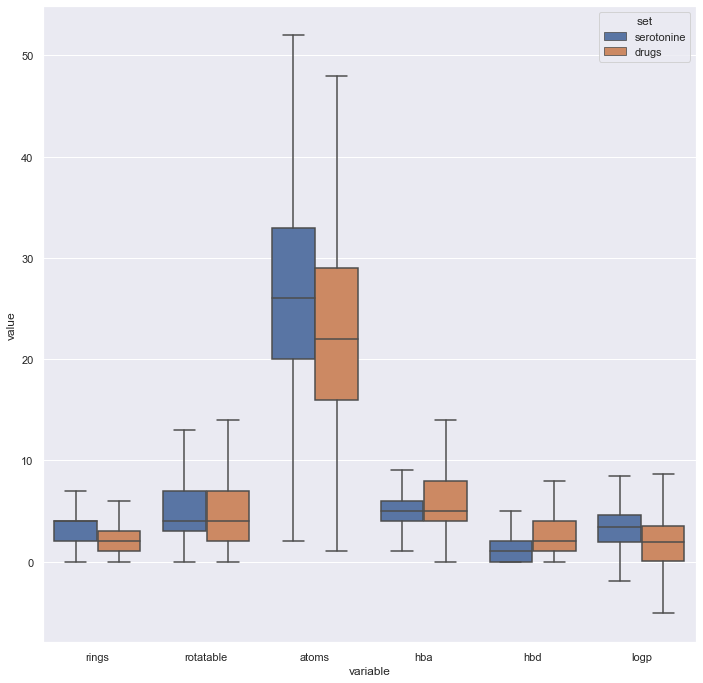

In [38]:
sns.boxplot(y='value', x='variable', hue='set', data=melted_df, showfliers=False)

In [39]:
melted_df2 = pd.melt(joint_df, id_vars=['set'], value_vars=['molwt', 'tpsa'])
melted_df2

,set,variable,value
0,serotonine,molwt,523.294725
1,serotonine,molwt,352.115796
2,serotonine,molwt,406.204801
3,serotonine,molwt,246.173213
4,serotonine,molwt,331.113667
...,...,...,...
17977,drugs,tpsa,20.230000
17978,drugs,tpsa,149.820000
17979,drugs,tpsa,403.100000
17980,drugs,tpsa,83.500000


<AxesSubplot:xlabel='variable', ylabel='value'>

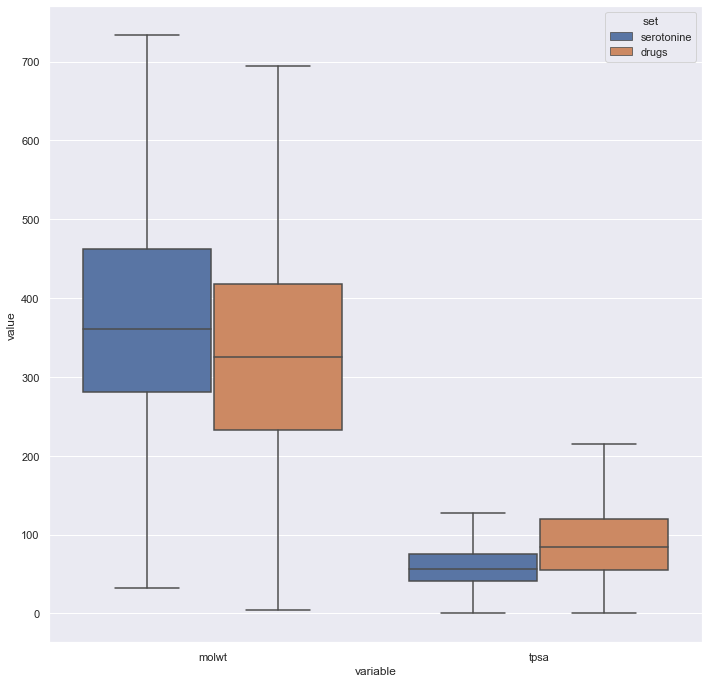

In [40]:
sns.boxplot(y='value', x='variable', hue='set', data=melted_df2, showfliers=False)

In comparison to known therapeutic substances in DrugBank, our set of mTOR ligands tends to have structures with many more rings, well beyond the third quartile ring count in DrugBank. mTOR ligands also have overall much higher number of heavy atoms, and higher molecular weight overall.

Probably the most interesting thing here is the discrepancy in the ratio of hydrogen bond acceptors (hba) to [hydrogen bond](https://en.wikipedia.org/wiki/Hydrogen_bond) donors (hbd) - mTOR inhibitors have a much larger amount of the former, and comparatively smaller amount of the latter. Maybe something to do with the cavity it binds to?

Hydrogen bond acceptors are usually heteroatoms (non H and C atoms, often O, N, S, etc.) that have some free electron pairs for hydrogen atoms to latch onto. Let's try if the observed trends between hydrogen bond acceptors can also be observed on heteroatom-specific descriptors. Since mTOR ligands are generally larger than DrugBank substances, the absolute counts of heteroatoms and heterocycles will probably be influenced by that. Instead, let's make our own descriptor of sorts: ratios of heteroatoms/all_atoms and heterocycles/all_cycles, to gain information about the heteroatom density in the molecules, and whether it reflects the observed differences in hydrogen bond acceptors.

Ligands of the serotonine receptor are qite close to the DrugBank averages in most cases, with a slightly higher molecular weight and atom count.
They tend to have fewer of both hydrogend bond acceptors and donors.

In [42]:

serotonine_heteroatoms_ratio = [rdescriptors.CalcNumHeteroatoms(l)/l.GetNumHeavyAtoms() 
                                for l in serotonine_ligands if l.GetNumHeavyAtoms()]
drugbank_heteroatoms_ratio = [rdescriptors.CalcNumHeteroatoms(l)/l.GetNumHeavyAtoms() 
                              for l in drugs if l.GetNumHeavyAtoms()]
# heterocycles = cycles with heteroatoms
serotonine_heterocycles_ratio = [rdescriptors.CalcNumHeterocycles(l)/rdescriptors.CalcNumRings(l)
                           for l in serotonine_ligands if rdescriptors.CalcNumRings(l)]
drugbank_heterocycles_ratio = [rdescriptors.CalcNumHeterocycles(l)/rdescriptors.CalcNumRings(l)
                               for l in drugs if rdescriptors.CalcNumRings(l)]

In [43]:
# Put the data into a DataFrame object, one formatted so that we don't need to 'melt' it for mapping into boxplot
# Make an initial dataframe, then extend it by each additional set
df = pd.DataFrame(data=[{'set': 'serotonine', 'variable': 'heteroatom_ratio', 'value': x}
                        for x in serotonine_heteroatoms_ratio])
df = df.append(pd.DataFrame(data=[{'set': 'drugbank', 'variable': 'heteroatom_ratio', 'value': x}
                                  for x in drugbank_heteroatoms_ratio]), ignore_index=True)
df = df.append(pd.DataFrame(data=[{'set': 'serotonine', 'variable': 'heterocycle_ratio', 'value': x}
                                  for x in serotonine_heterocycles_ratio]), ignore_index=True)
df = df.append(pd.DataFrame(data=[{'set': 'drugbank', 'variable': 'heterocycle_ratio', 'value': x}
                                  for x in drugbank_heterocycles_ratio]), ignore_index=True)
df

,set,variable,value
0,serotonine,heteroatom_ratio,0.179487
1,serotonine,heteroatom_ratio,0.240000
2,serotonine,heteroatom_ratio,0.285714
3,serotonine,heteroatom_ratio,0.166667
4,serotonine,heteroatom_ratio,0.428571
...,...,...,...
16878,drugbank,heterocycle_ratio,0.000000
16879,drugbank,heterocycle_ratio,0.000000
16880,drugbank,heterocycle_ratio,0.666667
16881,drugbank,heterocycle_ratio,0.500000


<AxesSubplot:xlabel='variable', ylabel='value'>

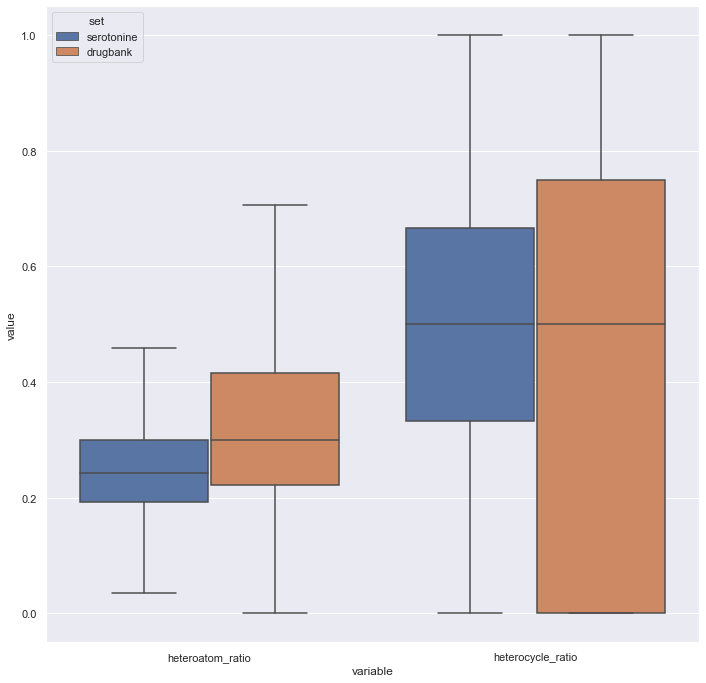

In [44]:
sns.boxplot(y='value', x='variable', hue='set', data=df, showfliers=False)

The overall ratio of heteroatoms within known mTOR ligands seems on par with the relative amount of heteroatoms within known drugs, even somewhat smaller. So, that can't be it. However, more interestingly, almost all cycles in known mTOR ligands contain heteroatoms, while only about half of the cycles in known drugs contain said heteroatoms. And since the known mTOR ligands contain many more rings in general, this may further widen the observed divide in hydrogen bond acceptor counts...

The ratios of heteroatoms and heterocycles in serotonine receptor ligans seems quite in line with DrugBank averages.


# What to do
 - have a look at the linked materials, also including [the article](http://www.chemicke-listy.cz/docs/full/2017_11_716-723.pdf) from the good ol' leaves. I am sure you were/will be told about descriptors at length from the actual lectures. For the purposes of this exercise, just please make sure you have some general notion of what a molecular descriptor is and what it can be used for
 - apply the aforedescribed methods onto your own dataset. How does DrugBank and mTOR compare to your dataset? Any comments/ideas? Also, if you do not have seaborn, just do "conda install seaborn" in your conda environment, it should sort itself out. If you have some other visualization preferences, with different graph styles and/or different libraries, you can use whatever you are comfortable with.
 - If you notice something interesting about your dataset, try to "zoom" onto the observed discrepancy using additional descriptors, their ratios or visualizations of your choosing. Here, it was the observed large amount of hydrogen bond acceptors followed by calculating heteroatom and heterocycle ratios. For your set, it might be something different. The whole point of this is you trying to follow and investigate the trends in your dataset. If you find everything in line with known drugs in DrugBank, congrats - your ligands seem pretty druglike. If that's the case, just try the heteroatom and heterocycle ratios ;)